In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import os
import random

In [111]:
read_path = './outputs/features'
tsne_info = np.load(os.path.join(read_path, 'tsne_info_usps.npz'), allow_pickle=True)

In [112]:
tsne_info['lbl_domain']

array([0, 0, 0, ..., 1, 1, 1])

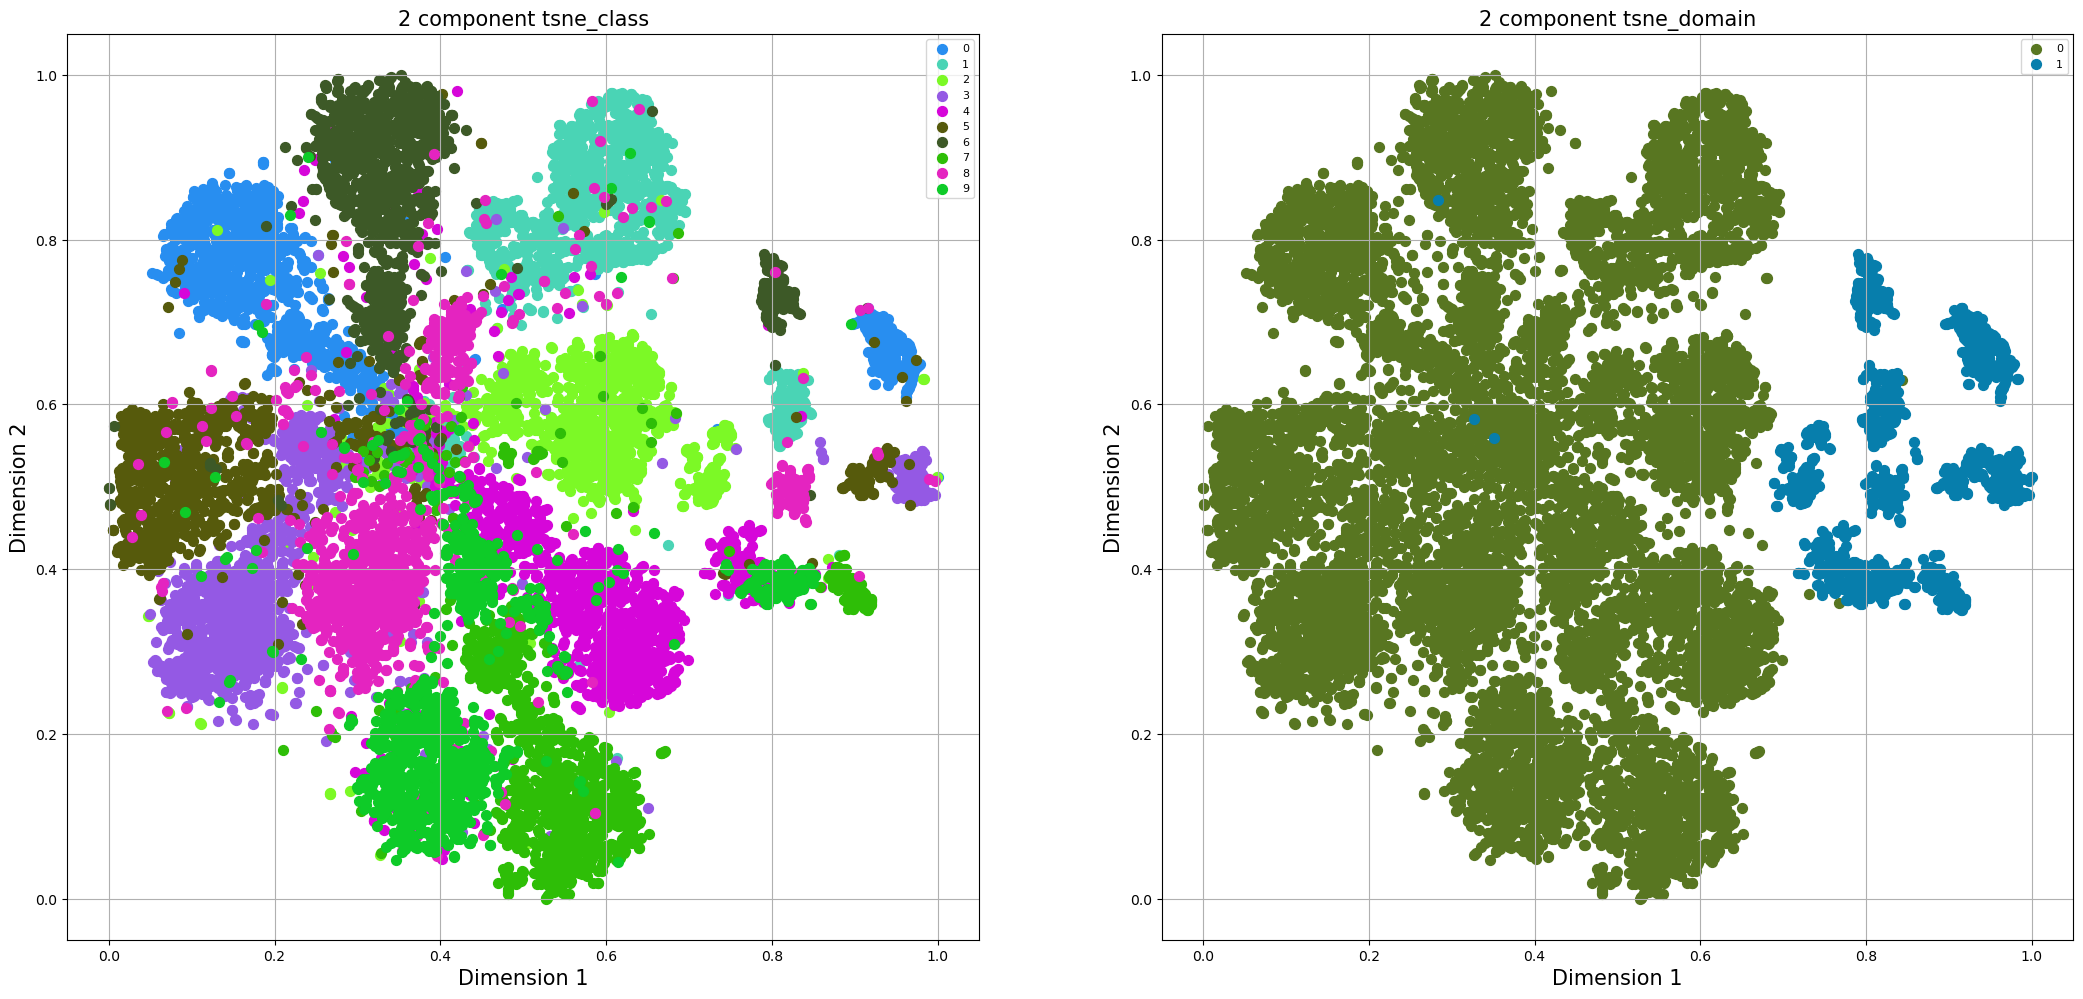

In [117]:
def tsne_plot(tsne_info):

    fig = plt.figure(figsize = (40,40))
    #color setting
    get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
    
    
    #read tsne info
    names = ['tsne_class', 'tsne_domain']
    labels = ['lbl_class', 'lbl_domain']
    color_cnt = [10, 2]
    #val_lbl = tsne_info['lbl']
    num = 1
    #get tsne array
    tsne_arr = tsne_info['tsne_feat']
    
    #by class and by label
    for i, lbl in enumerate(labels):        
        colors = get_colors(color_cnt[i])
        #construct df
        tsne_df = pd.DataFrame(tsne_arr, columns=['pc1','pc2'])
        tsne_df['label'] = tsne_info[lbl]
        ax = plt.subplot(3,3,num)
        
        #set label type
        if lbl == 'lbl_class':
            targets = [j for j in range(0,10)]
        if lbl == 'lbl_domain':
            targets = [j for j in range(0,2)]
        
        for target, color in zip(targets,colors):
            indicesToKeep = tsne_df['label'] == target
            ax.scatter(tsne_df.loc[indicesToKeep, 'pc1']
                       , tsne_df.loc[indicesToKeep, 'pc2']
                       , c = color
                       , s = 50)
        
            
        ax.set_xlabel('Dimension 1', fontsize = 15)
        ax.set_ylabel('Dimension 2', fontsize = 15)
        ax.set_title(f'2 component {names[i]}', fontsize = 15)
        ax.legend(targets, fontsize=8)
        ax.grid()
        
        save_dir = './outputs/plots'
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        num += 1
    plt.savefig(os.path.join(save_dir, f'tsne_plot_usps.png'))
    plt.show()
    
tsne_plot(tsne_info)

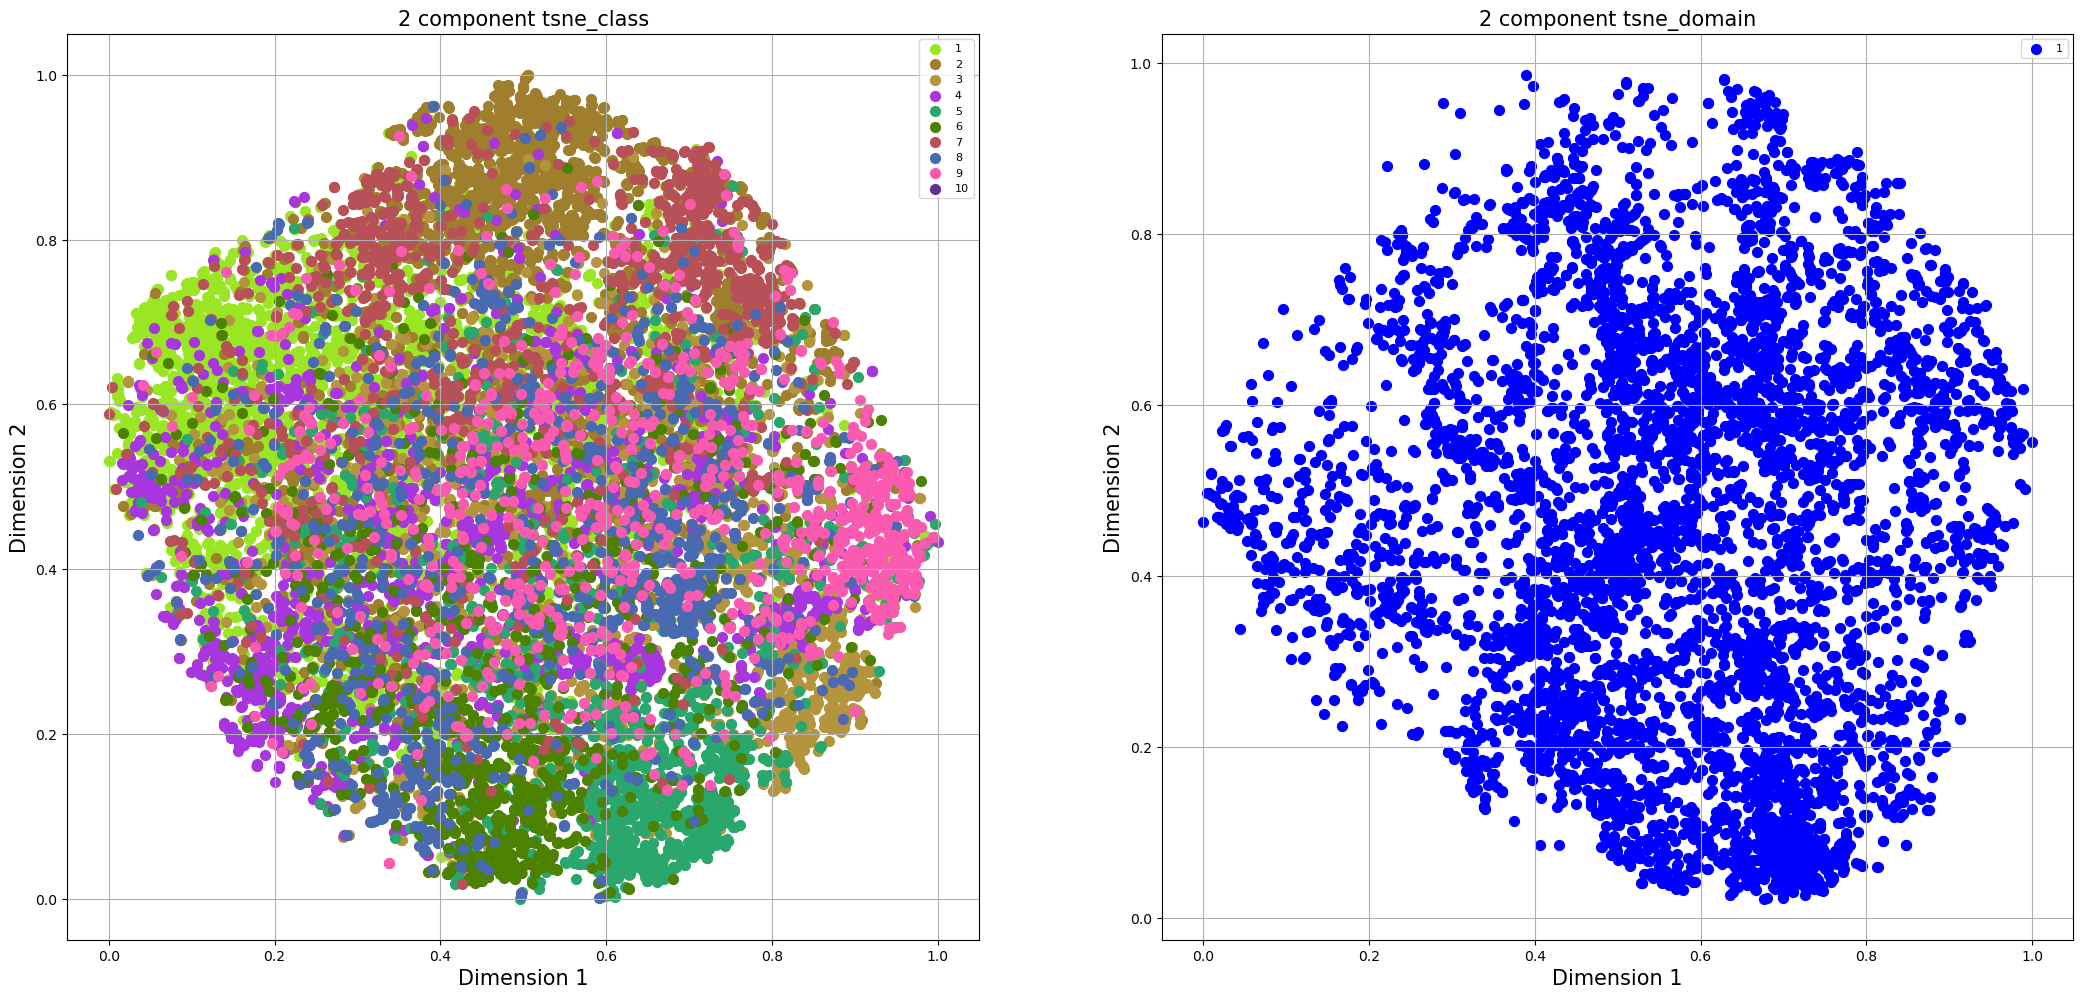

In [36]:
def tsne_plot(tsne_info):

    fig = plt.figure(figsize = (40,40))
    targets = [i for i in range(1,51)]
    #color setting
    get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
    
    
    #read pca info
    names = ['tsne_class', 'tsne_domain']
    labels = ['lbl_class', 'lbl_domain']
    color_cnt = [10, 2]
    #val_lbl = tsne_info['lbl']
    num = 1
    for i, name in enumerate(names):        
        tsne_arr = tsne_info[name]
        colors = get_colors(color_cnt[i])
        #construct df
        tsne_df = pd.DataFrame(tsne_arr, columns=['pc1','pc2'])
        tsne_df['label'] = tsne_info[labels[i]]
        ax = plt.subplot(3,3,num)
        if i == 1:
            colors = ['red', 'blue']
            indicesToKeep = tsne_df['label'] == 0
            ax.scatter(tsne_df.loc[indicesToKeep, 'pc1']
                       , tsne_df.loc[indicesToKeep, 'pc2']
                       , c = colors[1]
                       , s = 50)
        else:
            for target, color in zip(targets,colors):
                indicesToKeep = tsne_df['label'] == target
                ax.scatter(tsne_df.loc[indicesToKeep, 'pc1']
                           , tsne_df.loc[indicesToKeep, 'pc2']
                           , c = color
                           , s = 50)
            
        ax.set_xlabel('Dimension 1', fontsize = 15)
        ax.set_ylabel('Dimension 2', fontsize = 15)
        ax.set_title(f'2 component {name}', fontsize = 15)
        ax.legend(targets, fontsize=8)
        ax.grid()
        
        save_dir = '../outputs/plots'
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        num += 1
    plt.savefig(os.path.join(save_dir, f'tsne_plot.png'))
    plt.show()
    
tsne_plot(tsne_info)